In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (10, 10))

In [2]:
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [3]:
path = "agrupadas_notas_normalizadoQuantil.csv"
dadosEnem = pd.read_csv(path,sep=';',low_memory=False,index_col=0)


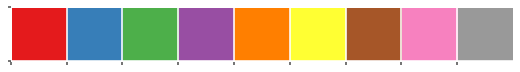

In [4]:
# Bom para brincar e escolher o tipo da Paleta

#sns.choose_colorbrewer_palette("qualitative")
#qualitative
#sequential


sns.palplot(sns.color_palette("Set1"))
sns.set_palette(sns.color_palette("Set1"))

In [5]:
clusterOrder = ['A','B'] 
clusterOrderLabels = ['Cluster A','Cluster B'] 


dadosEnem['Cluster'].replace(to_replace =[1], value =clusterOrder[0],inplace=True) 
dadosEnem['Cluster'].replace(to_replace =[0], value =clusterOrder[1],inplace=True) 
# Por convenção vou deixar o B como o cluster de "Notas Altas", mas o algoritmo de clusterização nem sempre salva
# o cluster 1 como o de notas altas, então pode ser necessário trocar a ordem

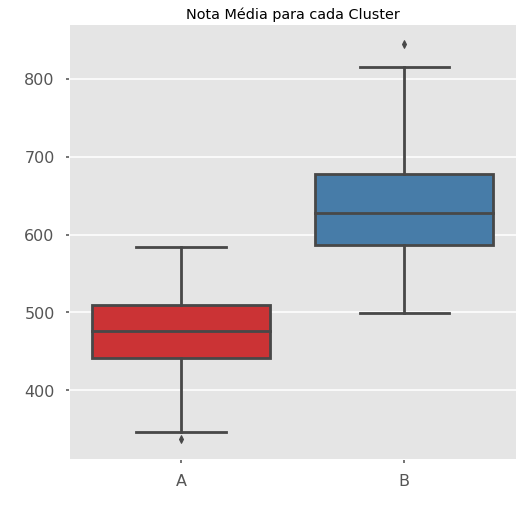

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
G = sns.boxplot(x="Cluster", y="mediaNota", data=df)

G.set_xticklabels(clusterOrder)
G.set_xlabel(" ")
G.set_ylabel(" ")
G.set_title("Nota Média para cada Cluster")
G.figure.savefig("Gráficos/NotaMedia_perCluster")


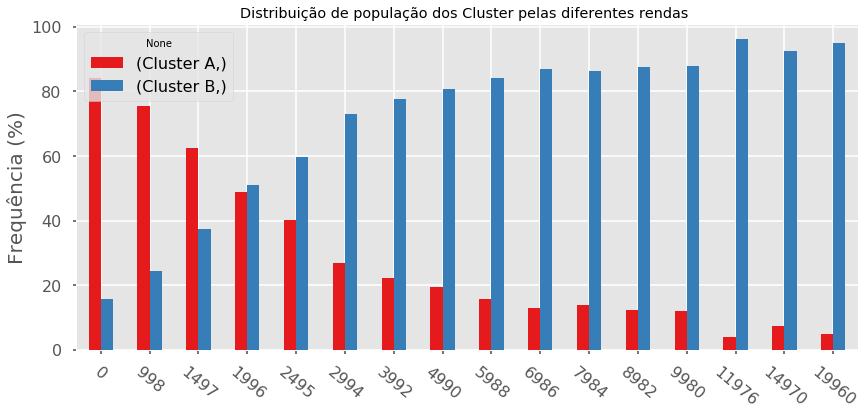

In [7]:
rendas = [] 
limites = ['0','998','1497','1996','2495','2994','3992','4990','5988','6986','7984','8982','9980','11976','14970','19960']

for var in limites:
    total_Renda = dadosEnem.query("RendaMaxima == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("RendaMaxima == " + var + "and Cluster == '" + clusterOrder[0] + "'").shape[0]/total_Renda)
    rendas.append(dadosEnem.query("RendaMaxima == " + var +  "and Cluster == '" + clusterOrder[1] + "'").shape[0]/total_Renda)    



teste = pd.DataFrame({'0':rendas[:2], '998':rendas[2:4],'1497':rendas[4:6],'1996':rendas[6:8],'2495':rendas[8:10],
                      '2994':rendas[10:12],
                      '3992':rendas[12:14],'4990':rendas[14:16],'5988':rendas[16:18],'6986':rendas[18:20],'7984':rendas[20:22],
                      '8982':rendas[22:24],'9980':rendas[24:26],'11976':rendas[26:28],'14970':rendas[28:30],'19960':rendas[30:32]})

df = teste.T
df.columns = [clusterOrderLabels]



ax = df.plot(kind='bar',figsize=(14, 6))

ax.set_yticklabels(['0','20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-40)
text = ax.set_ylabel("Frequência (%)")
text.set_fontsize(20)
titile = ax.set_title("Distribuição de população dos Cluster pelas diferentes rendas ")
ax.figure.savefig("Gráficos/DistribuicaoPopCluster_perRenda")  



In [8]:
# Muda o label das variáveis, justificado no artigo

dadosEnem['TP_COR_RACA'].replace(to_replace =['Preta','Parda','Amarelo','Indigena'], value ='NãoBranco',inplace=True) 
dadosEnem['TP_COR_RACA'].replace(to_replace =['NaoDeclarado'], value ='NãoDeclarado',inplace=True)

In [9]:
# O Workflow do Orange discretiza as notas segundo o método equal-widht-binding

dadosAgrupados = pd.read_csv("agrupadas_notas_processado.csv")

In [10]:
total_Renda = dadosAgrupados.query("mediaNota == " + var).shape[0]
total_Renda

0

In [11]:
dadosAgrupados.mediaNota.value_counts()

#Substituir os valores de limites pelos reultados do value_counts

limites = ["'< 471.09'","'471.09 - 535.38'","'535.38 - 620.47'","'≥ 620.47'"]

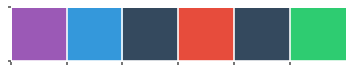

In [12]:
flatui = ["#9b59b6", "#3498db", "#34495e", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))
sns.set_palette(sns.color_palette(flatui))


1454
1428
1330
1121


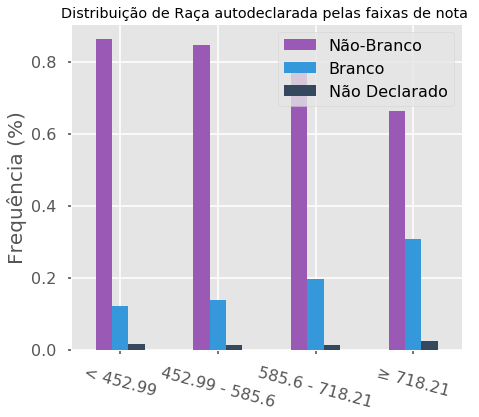

In [13]:
rendas = [] 


for var in limites:
    total_Renda = dadosAgrupados.query("mediaNota == " + var).shape[0] 
    print(dadosAgrupados.query("mediaNota == " + var + "and TP_COR_RACA == 'NãoBranco'").shape[0])
    rendas.append(dadosAgrupados.query("mediaNota == " + var + "and TP_COR_RACA == 'NãoBranco'").shape[0]/total_Renda)
    rendas.append(dadosAgrupados.query("mediaNota == " + var +  "and TP_COR_RACA == 'Branco'").shape[0]/total_Renda)
    rendas.append(dadosAgrupados.query("mediaNota == " + var +  "and TP_COR_RACA == 'NãoDeclarado'").shape[0]/total_Renda)   



data = pd.DataFrame({
    '< 452.99':rendas[:3], '452.99 - 585.6':rendas[3:6],'585.6 - 718.21':rendas[6:9], '≥ 718.21': rendas[9:12] })

data = data.T
data.columns = ['Não-Branco','Branco','Não Declarado']


ax = data.plot(kind='bar',figsize=(7, 6))
#ax.set_yticklabels(['20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-15)
text = ax.set_ylabel("Frequência (%)")
 
text.set_fontsize(20)
title = ax.set_title("Distribuição de Raça autodeclarada pelas faixas de nota ")    
ax.figure.savefig("Gráficos/Raca_perNota")


In [14]:

sns.set_palette(sns.color_palette("Set1"))

In [15]:
#atenção a clusterOrder

print(clusterOrderLabels)

dadosEnem['Cluster'].replace(to_replace =[0], value =clusterOrder[0],inplace=True) 
dadosEnem['Cluster'].replace(to_replace =[1], value =clusterOrder[1],inplace=True) 


['Cluster A', 'Cluster B']


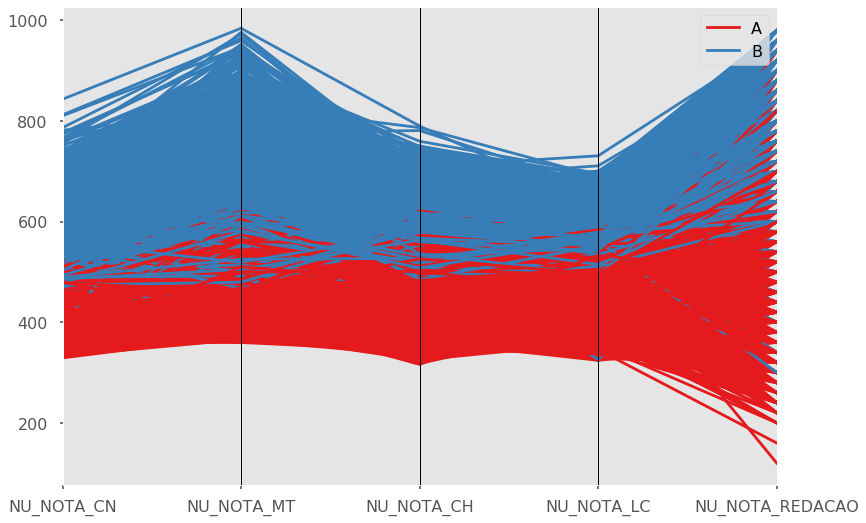

In [16]:
from pandas.plotting import parallel_coordinates


ax = parallel_coordinates(dadosEnem[['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','Cluster']], 'Cluster',color=[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),(0.21568627450980393, 0.4941176470588236, 0.7215686274509804)])

ax.figure.savefig("Gráficos/CoordernadasParalelas")

In [17]:
import re



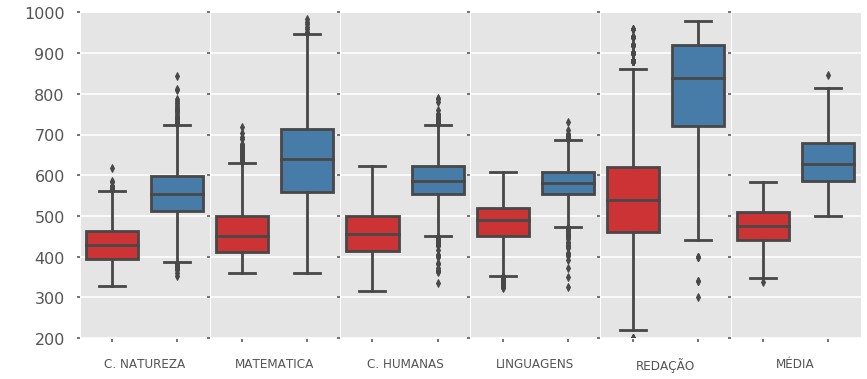

In [18]:
sns.set_palette(sns.color_palette("Set1"))


df = dadosEnem
df["Nota_Média"] = df["mediaNota"]
area = plt.figure(figsize=(14, 6))
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
notas = ['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','mediaNota']
nomes = ['C. NATUREZA','MATEMATICA','C. HUMANAS','LINGUAGENS','REDAÇÃO','MÉDIA']
for i in range(len(notas)):
    g = area.add_subplot(1, 6, i+1)
    g = sns.boxplot(x="Cluster", y=notas[i], data=df)
    #print(notas[i])
    A = df.query("Cluster == 'A'")[notas[i]].median()
    B = df.query("Cluster == 'B'")[notas[i]].median()
    #print("Notas Custer A", A)
    #print("Notas Custer B", B )
    #print("Diferença: ", B - A)
    #print("-----")
    g.set_ylabel(" ")
    g.set_xlabel(nomes[i])
    g.set_ylim(200,1001)
    g.set_xticklabels("")
    if(i!=0):
        g.set_yticklabels("")
       



plt.subplots_adjust(wspace = 0)
plt.savefig("Gráficos/Notas_perCLuster")


#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
#G.set_xlabel(" ")
#G.set_ylabel(" ")

In [19]:
print("Notas Custer A", df.query("Cluster == 'A'")["NU_NOTA_MT"].median())
    
print("Notas Custer B", df.query("Cluster == 'B'")["NU_NOTA_MT"].median())

Notas Custer A 450.8
Notas Custer B 639.2


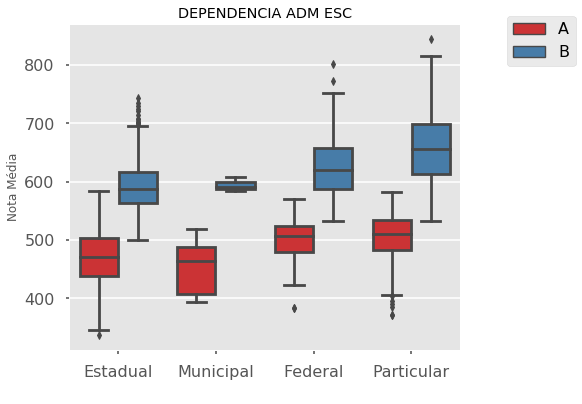

In [20]:
sns.set_palette(sns.color_palette("Set1"))
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem
G = sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC", y="mediaNota",  hue="Cluster", data=df,  order=['Estadual','Municipal','Federal','Particular'])
G.set_xlabel(" ")
legend = G.legend(bbox_to_anchor=(1.1, 1.05))
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
G.set_ylabel("Nota Média")
G.set_title("DEPENDENCIA ADM ESC")
G.figure.savefig("Gráficos/TP_DEPENDENCIA_ADM_ESC_perCluster")


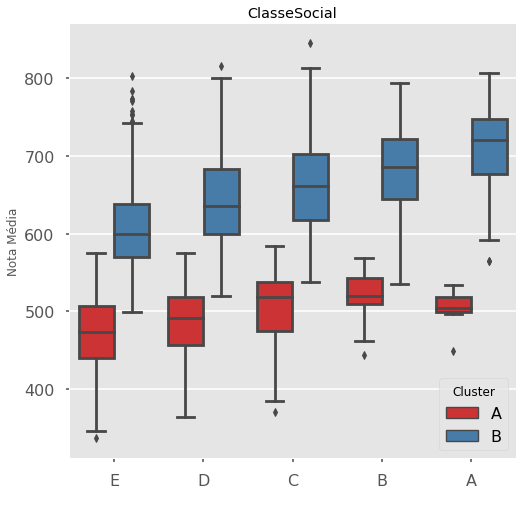

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem

G = sns.boxplot(x="ClasseSocial", y="mediaNota", data=df,  hue="Cluster", order=['E','D','C','B','A'])

G.set_xlabel(" ")
G.set_ylabel("Nota Média")
G.set_title("ClasseSocial")
G.figure.savefig("Gráficos/ClasseSocial_perCluster")

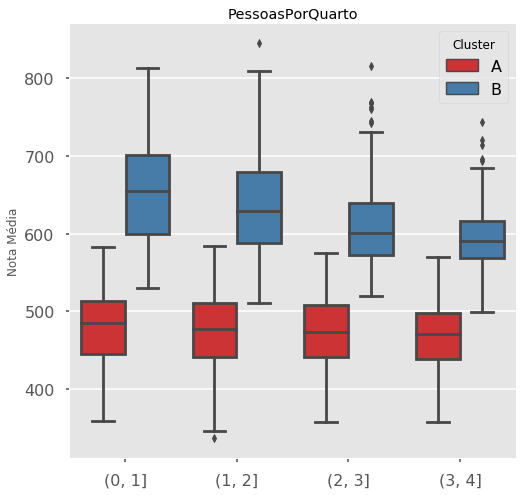

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
G = sns.boxplot(x="PessoasPorQuarto", y="mediaNota", hue="Cluster", data=df, order=['(0, 1]','(1, 2]','(2, 3]','(3, 4]'])

G.set_xlabel("")
G.set_ylabel("Nota Média")
G.set_title("PessoasPorQuarto")
G.figure.savefig("Gráficos/PessoasPorQuarto_perCluster")

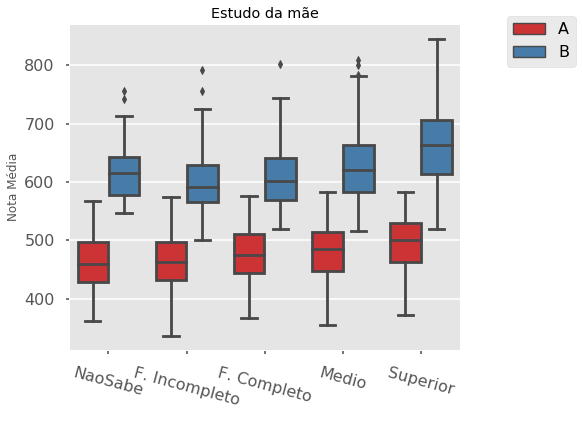

In [23]:
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem
G = sns.boxplot(x="Q002", y="mediaNota", data=df, hue="Cluster", order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-15)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel("Nota Média")
G.set_title("Estudo da mãe")
G.figure.savefig("Gráficos/EstudoMãe_perCluster")
legend = G.legend(bbox_to_anchor=(1.1, 1.05))
